<a href="https://colab.research.google.com/github/CaseySobon/Variational-autoencoder-VAE/blob/main/VAE_Minst_test1.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
from keras.datasets import mnist
import numpy as np
(x_train, _), (x_test, _) = mnist.load_data()

In [ ]:
x_train = x_train.astype('float32') / 255.
x_test = x_test.astype('float32') / 255.
x_train = x_train.reshape((len(x_train), np.prod(x_train.shape[1:])))
x_test = x_test.reshape((len(x_test), np.prod(x_test.shape[1:])))
print(x_train.shape)
print(x_test.shape)

(60000, 784)
(10000, 784)


In [ ]:
from keras.layers import Input, Dense
from keras.models import Model, Sequential
# input dimension = 784
input_dim = x_train.shape[1]
encoding_dim = 32

compression_factor = float(input_dim) / encoding_dim
print("Compression factor: %s" % compression_factor)

autoencoder = Sequential()
autoencoder.add(
    Dense(encoding_dim, input_shape=(input_dim,), activation='relu')
)
autoencoder.add(
    Dense(input_dim, activation='sigmoid')
)

autoencoder.summary()

Compression factor: 24.5
Model: "sequential_1"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 dense_10 (Dense)            (None, 32)                25120     
                                                                 
 dense_11 (Dense)            (None, 784)               25872     
                                                                 
Total params: 50,992
Trainable params: 50,992
Non-trainable params: 0
_________________________________________________________________


In [ ]:
input_img = Input(shape=(input_dim,))
encoder_layer = autoencoder.layers[0]
encoder = Model(input_img, encoder_layer(input_img))

encoder.summary()

Model: "model_13"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 input_10 (InputLayer)       [(None, 784)]             0         
                                                                 
 dense_10 (Dense)            (None, 32)                25120     
                                                                 
Total params: 25,120
Trainable params: 25,120
Non-trainable params: 0
_________________________________________________________________


In [ ]:
autoencoder.compile(optimizer='adam', loss='binary_crossentropy')
autoencoder.fit(x_train, x_train,
                epochs=50,
                batch_size=256,
                shuffle=True,
                validation_data=(x_test, x_test))

Epoch 1/50
235/235 [==============================] - 4s 13ms/step - loss: 0.2781 - val_loss: 0.1932
Epoch 2/50
235/235 [==============================] - 3s 13ms/step - loss: 0.1731 - val_loss: 0.1552
Epoch 3/50
235/235 [==============================] - 3s 12ms/step - loss: 0.1454 - val_loss: 0.1343
Epoch 4/50
235/235 [==============================] - 3s 12ms/step - loss: 0.1287 - val_loss: 0.1210
Epoch 5/50
235/235 [==============================] - 3s 12ms/step - loss: 0.1182 - val_loss: 0.1128
Epoch 6/50
235/235 [==============================] - 3s 12ms/step - loss: 0.1113 - val_loss: 0.1072
Epoch 7/50
235/235 [==============================] - 3s 12ms/step - loss: 0.1063 - val_loss: 0.1029
Epoch 8/50
235/235 [==============================] - 3s 12ms/step - loss: 0.1025 - val_loss: 0.0996
Epoch 9/50
235/235 [==============================] - 3s 12ms/step - loss: 0.0997 - val_loss: 0.0972
Epoch 10/50
235/235 [==============================] - 3s 12ms/step - loss: 0.0977 - val_lo

313/313 [==============================] - 1s 2ms/step


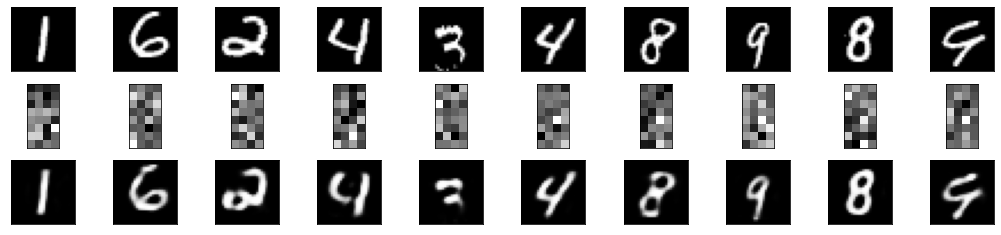

In [ ]:
num_images = 10
np.random.seed(42)
random_test_images = np.random.randint(x_test.shape[0], size=num_images)


encoded_imgs = encoder.predict(x_test)
decoded_imgs = autoencoder.predict(x_test)

import matplotlib.pyplot as plt
plt.figure(figsize=(18, 4))

for i, image_idx in enumerate(random_test_images):
    # plot original image
    ax = plt.subplot(3, num_images, i + 1)
    plt.imshow(x_test[image_idx].reshape(28, 28))
    plt.gray()
    ax.get_xaxis().set_visible(False)
    ax.get_yaxis().set_visible(False)

    # plot encoded image
    ax = plt.subplot(3, num_images, num_images + i + 1)
    plt.imshow(encoded_imgs[image_idx].reshape(8, 4))
    plt.gray()
    ax.get_xaxis().set_visible(False)
    ax.get_yaxis().set_visible(False)

    # plot reconstructed image
    ax = plt.subplot(3, num_images, 2*num_images + i + 1)
    plt.imshow(decoded_imgs[image_idx].reshape(28, 28))
    plt.gray()
    ax.get_xaxis().set_visible(False)
    ax.get_yaxis().set_visible(False)
plt.show()

[ 1.2785248  6.297896   0.0906781 ...  0.9614606 12.439273  11.206801 ]
[3846 2836  311  200 8077 2462 1017 3768 2536 3893]
3846
2836
311
200
8077
2462
1017
3768
2536
3893


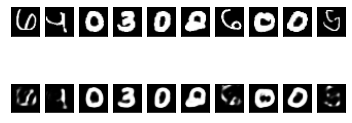

In [ ]:
sample = []

for i in range(len(x_test)):
  sample.append(abs(np.subtract(decoded_imgs[i],x_test[i]).sum()))


data = np.array(sample)
print(data)
ind = data.argsort()[-10:][::-1]
print(ind)


for i in range(10):
  print(ind[i])
  # plot original image
  ax = plt.subplot(3, num_images, i + 1)
  plt.imshow(x_test[ind[i]].reshape(28, 28))
  plt.gray()
  ax.get_xaxis().set_visible(False)
  ax.get_yaxis().set_visible(False)

  ax = plt.subplot(3, num_images, num_images + i + 1)
  plt.imshow(decoded_imgs[ind[i]].reshape(28, 28))
  plt.gray()
  ax.get_xaxis().set_visible(False)
  ax.get_yaxis().set_visible(False)


plt.show()